# Chapter 2

In [4]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join('datasets','housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):

    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()
fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH)

In [7]:
import pandas as pd
def load_housing_data(housing_path = HOUSING_PATH):
    
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

housing_df = load_housing_data(housing_path = HOUSING_PATH)
display(housing_df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# EDA

In [10]:
housing_df.info()
housing_df.ocean_proximity.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


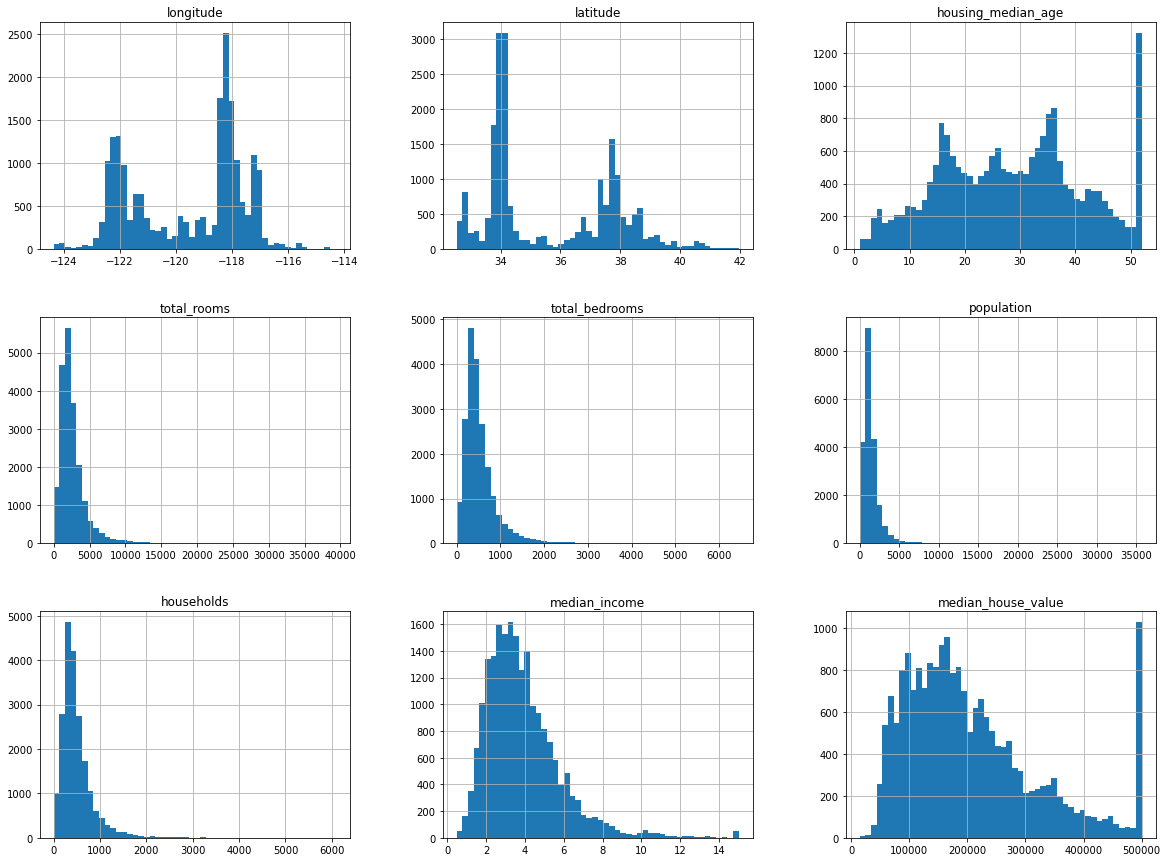

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
housing_df.hist(bins = 50, figsize = (20,15))
plt.show()

# Creating a test set

In [18]:
import numpy as np
# random sampling method
def split_train_test(data, test_ratio):
    
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices] 

train_set,test_set = split_train_test(data = housing_df, test_ratio = 0.2)

<AxesSubplot:>

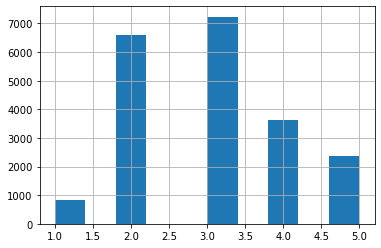

In [19]:
# stratified sampling: the population is divided intohomogeneous subgroups called 'strata', and the right umber of instances is ampled from each stratum to garuantee
# that the test set is representative of the overall population
housing_df['income_category'] = pd.cut(housing_df['median_income'],
                                   bins = [0,1.5,3.0,4.5,6,np.inf],
                                   labels = [1,2,3,4,5])
housing_df['income_category'].hist()

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index,test_index in split.split(housing_df,housing_df['income_category']):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]
# strat_train_set
strat_test_set['income_category'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64

# Visualize the data

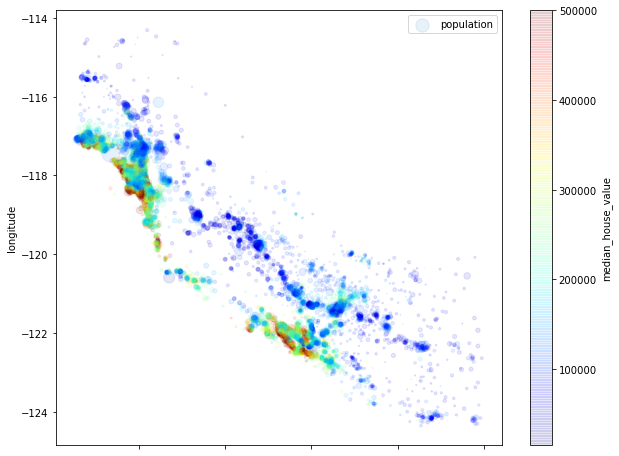

In [42]:
train_df = strat_train_set.copy()
train_df.plot(kind = 'scatter',x = 'latitude', y = 'longitude', alpha = 0.1,
              s = train_df['population'] / 100, label = 'population', figsize = (10,8),
             c = 'median_house_value',cmap = plt.get_cmap('jet') ,colorbar = True)
plt.legend()

# Correlation

In [43]:
corr_matrix = train_df.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='median_income'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms'

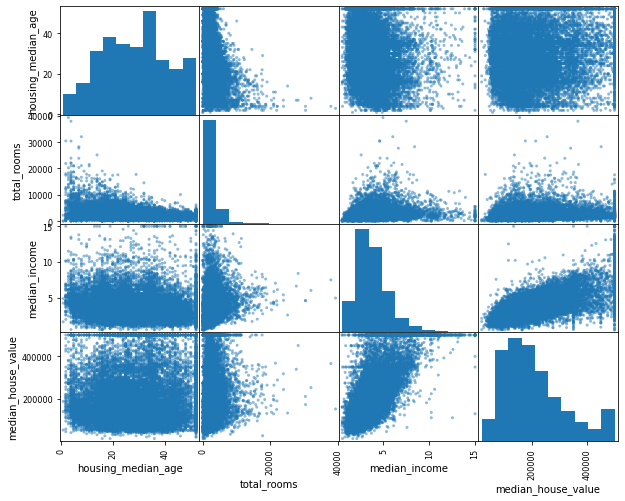

In [44]:
from pandas.plotting import scatter_matrix

attributes = ['housing_median_age', 'total_rooms','median_income','median_house_value']
scatter_matrix(train_df[attributes],figsize = [10,8])

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

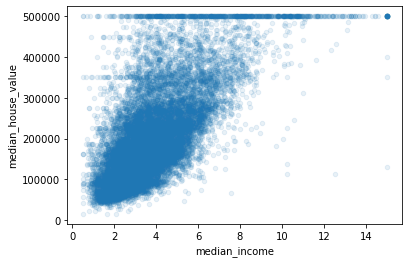

In [45]:
train_df.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value',alpha = 0.1)

# Experimenting with Attributes Combinations

In [46]:
train_df['rooms_per_household'] = train_df['total_rooms'] / train_df['households']
train_df['bedrooms_per_room'] = train_df['total_bedrooms'] / train_df['total_rooms']
train_df['population_per_household'] = train_df['population'] / train_df['households']

In [47]:
corr_matrix = train_df.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Prepare the data for ML algos

### Data cleaning

In [64]:
X_train = strat_train_set.drop('median_house_value', axis= 1)
y_train = strat_train_set['median_house_value'].copy()

In [65]:
# fill nan with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
X_train_num = X_train.drop('ocean_proximity',axis = 1)
imputer.fit(X_train_num)
print(imputer.statistics_)
X = imputer.transform(X_train_num)
X_train_tr = pd.DataFrame(X , columns = X_train_num.columns)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409    3.    ]


In [69]:
from sklearn.preprocessing import OrdinalEncoder
train_df_cat = train_df[['ocean_proximity']]
ordinal_incoder = OrdinalEncoder()
ordinal_incoder.fit_transform(train_df_cat)
print(ordinal_incoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [72]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
train_df_cat_hot = cat_encoder.fit_transform(train_df_cat)
train_df_cat_hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

# Feature scaling
### min max scaling (normalization): shifted and rescale so value range from 0 to 1
### Standardization: subtract the mean and divide by the std. result distribution will have unit variance. (not bound to a range, so not suitable forsome ML algos but less affected by outliers)


# Tranformation Pipelines


In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler()),
])

In [80]:
list(X_train_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'income_category']

In [82]:
from sklearn.compose import ColumnTransformer

num_attri = list(X_train_num)
cat_attri = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attri),
    ('cat', OneHotEncoder(), cat_attri)
])

housing_prepared = full_pipeline.fit_transform(X_train)

# Select and train model